# ch 15_8 Logistic Regression

지금까지 선형 회귀 모델에 대해서 알아보았습니다. 선형 회귀 모델은 종속 변수가 연속형 변수였습니다. 

그런데 예측을 해야할 종속 변수가 범주형 변수인 classification 테스크에 대해선 어떻게 해야할까요? 예측해야할 클래스가 딱 2개인 binary classification에 적용할 수 있는 모델이 logistic regression 모델입니다.

## Logit 변환

### Odds

우리가 원하는 것은 종속 변수가 0과 1로 이루어진 범주형 변수일 때, 선형 회귀 모델을 적용하는 것입니다. 이를 위해 범주형 변수를 로짓으로 변환하여 연속형 변수로 만들어줍니다. 

logistic regression 모델을 이해하기 위해서는 먼저 Odd(오즈)를 이해해야 합니다. 오즈란 확률 / (1-확률)을 의미합니다.

$$Odds=\frac{p}{1-p}$$

오즈를 그래프로 나타내면 아래와 같습니다.

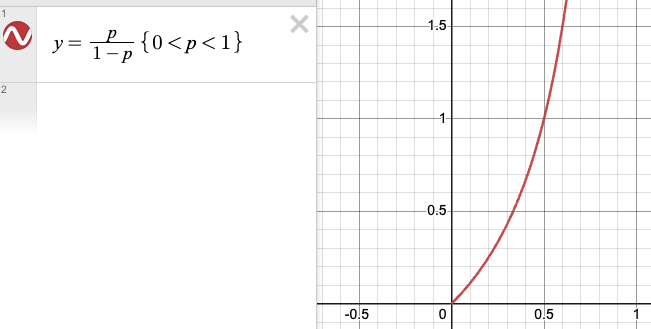

오즈는 원래 경마장에서 상금 지불률을 정할 때 사용했다고 합니다. 먼저 세 마리의 말이 있다고 가정하겠습니다.

- A: 50% 승리
- B: 30% 승리
- C: 20% 승리

1. 1000원의 마권을 사게하고, 승자를 맞춘 사람에게 3000원 지불
- A말 마권을 살 경우 기대값 = 3000 * 50% = 1500
- B말 마권을 살 경우 기대값 = 3000 * 30% = 900
- C말 마권을 살 경우 기대값 = 3000 * 20% = 600

→ 무조건 승률이 높은 A 말한테 걸게됨!

2. 1000원의 마권을 사게 하고, 예상 승률의 역수배를 지불한다.
- A말 마권을 살 경우 기대값 = 1000 * (1/50%) * 50% = 1000
- B말 마권을 살 경우 기대값 = 1000 * (1/30%) * 30% = 1000
- C말 마권을 살 경우 기대값 = 1000 * (1/20%) * 20% = 1000

→ 어느 쪽에 걸더라도 기대값 상금이 같아져 패자의 손실과 승자의 이익이 상쇄됨

3. 1000원의 마권을 사게하고, 오즈의 역수배를 지불한다.
- A 오즈: 0.5 / (1 - 0.5) = 1, 역수배: 1
- B 오즈: 0.3 / (1 - 0.3) = 0.43, 역수배: 2.33
- C 오즈: 0.2 / (1 - 0.2) = 0.25, 역수배: 4
- A말 마권을 살 경우 기대값 = 1000 * 1 * 50% = 500
- B말 마권을 살 경우 기대값 = 1000 * 2.33 * 30% = 700
- C말 마권을 살 경우 기대값 = 1000 * 4 * 20% = 800

→ C의 기대값이 제일 높아진다!

### Log Odds

Odds에 log를 취해주면 이를 log odds, 또는 logit이라고 부릅니다. logit을 그래프로 나타내면 아래와 같습니다. 

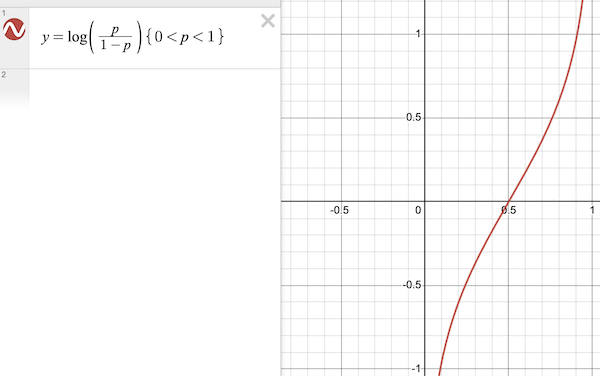

로짓은 음의 무한대부터 양의 무한대 사이의 값을 가지게 됩니다. 즉, 범주형 종속 변수를 로짓으로 변환할 경우, 회귀 모델을 적용할 수 있게 됩니다.

## Logistic Regression

로지스틱 리그레션은 범주형 종속 변수를 로짓으로 변환하고, 이를 회귀식을 통해서 예측하는 모델입니다. 즉, 회귀식을 통해서 예측을 하는 것은 종속 변수의 log odds입니다.

$$log({\frac{p(x)}{1-p(x)}})=\beta_{0}+\beta_{1}x_{1}+...+\beta_{k}x_{k}$$

이를 좌변과 우변에 자연 로그 승을 취해주고, 항들을 정리해주면 아래와 같은 식이 유도됩니다.

$${\frac{p(x)}{1-p(x)}}=e^{\beta_{0}+\beta_{1}x_{1}+...+\beta_{k}x_{k}}$$

$$e^{\beta_{0}+\beta_{1}x_{1}+...+\beta_{k}x_{k}}=e^z$$

$${\frac{p(x)}{1-p(x)}}=e^{z}$$

$$p(x)=e^{z}-e^{z}p(x)$$

$$(1+e^z)p(x)=e^{z}$$

$$p(x)=\frac{e^{z}}{1+e^z}=\frac{1}{1+e^{-z}}$$


## Sigmoid

마지막에 도출된 식을 그래프로 그려보면, 0일 때 0.5 값을 가지고, 완만한 S자 형태의 곡선 모양을 취하는 것을 알 수 있습니다. 이를 logistic function 혹은 sigmoid라고 부릅니다. (sigmoid는 이후 딥 러닝 챕터에서 중요하게 등장하니, 반드시 개념을 잘 기억해두시기 바랍니다.)

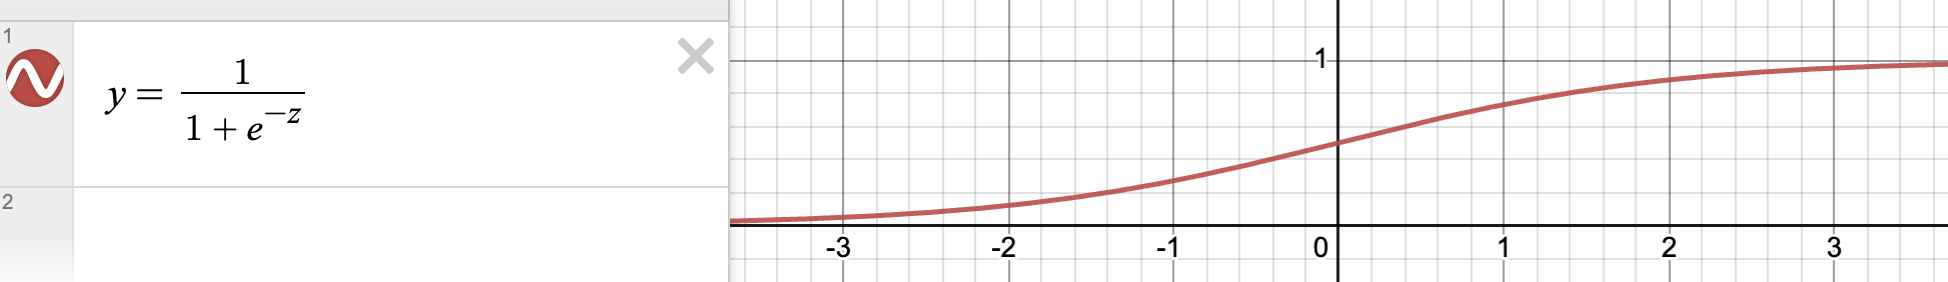

sigmoid 함수는 어떤 값이 입력으로 들어오던 0과 1 사이 출력 값을 리턴합니다. 이 값이 0.5보다 작으면 0, 0.5보다 크면 1로 분류를 수행하는 모델입니다. 종속 변수를 로짓으로 변환하고, 회귀식을 통해 로짓을 예측하는 모델은 회귀식에 sigmoid 함수를 한번 취해주는 것으로 표현할 수 있습니다.

## 예제) 타이타닉 생존자 예측

### Logistic Regression 모델 학습

타이타닉 데이터 셋을 이용해서 생존 여부를 예측하는 logistic regression 모델을 학습시켜 보겠습니다.

In [10]:
from utils import load_titanic_dataset
import statsmodels.api as sm

x_train, x_test, y_train, y_test = load_titanic_dataset()
x_train = x_train[["Age", "Fare", "Sex"]]
x_test = x_test[["Age", "Fare", "Sex"]]

In [11]:
x_constant_train = sm.add_constant(x_train)
logit_model = sm.Logit(y_train, x_constant_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.497790
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  571
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            3
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                  0.2631
Time:                        14:58:57   Log-Likelihood:                -284.24
converged:                       True   LL-Null:                       -385.70
Covariance Type:            nonrobust   LLR p-value:                 9.829e-44
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2986      0.278      4.666      0.000       0.753       1.844
Age           -0.0171      0.

### 회귀 계수의 해석

다중 선형회귀에서 회귀 계수가 의미하는 바는 나머지 독립 변수들이 고정되어 있을 때, 특정 독립 변수를 한 단위 증가시켰을 때의 종속 변수의 변화량이었습니다. 비슷하게, 로지스틱 리그레션에서 회귀 계수의 의미는 나머지 독립변수들을 고정 시켰을 때의 로짓 변화량입니다. 예를 들어 Fare를 $1 만큼 더 지불하면 생존 가능성의 로짓이 0.0112만큼 증가합니다. 이는 직관적이지 못하므로 자연 지수승을 취하겠습니다.

In [12]:
import numpy as np

np.exp(result.params)

const    3.664229
Age      0.983079
Fare     1.011220
Sex      0.083863
dtype: float64

exponential을 적용한 뒤, 다시 해석을 해보면 Fare를 1$ 더 지불하면 생존 확률의 오즈가 1.011 증가한다고 해석할 수 있습니다. 아래 그래프에서 x축은 생존 확률, y축은 생존 확률의 오즈입니다. 오즈가 1.011 증가한다는 의미는 y 축 방향으로의 이동입니다. 

오즈가 같은 값으로 증가했다 하더라도, 이전에 오즈가 작았다면 생존율은 큰 폭으로 증가하고, 이전에 오즈가 컸다면 생존율은 작은 폭으로 증가합니다. 따라서 로지스틱 회귀 분석에서 회귀 계수를 해석할 때에는 주의가 필요합니다.

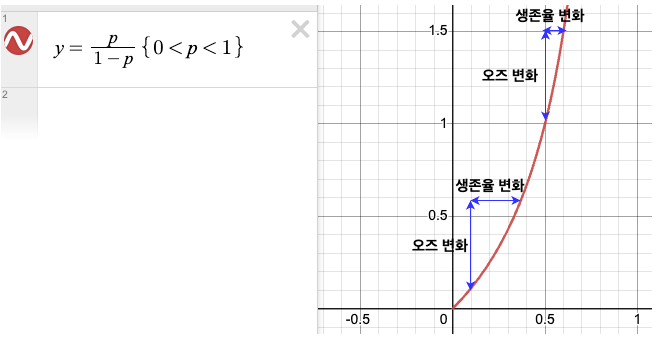

### 그 외 지표들
그 외에 summary에는 회귀 계수들의 유의성 검정 결과와 다른 지표들이 출력되었습니다. 간단히 짚고 넘어가겠습니다.

- Pseudo R-squ: R sqaure를 대체하는 값으로모델에 의해 설명되는 종속 변수 변동량을 측정합니다. 최대값은 1로 높을수록 좋습니다.
- LL-null, LLR p-value: 선형 회귀의 f-value 및 Prob(f)와 동일합니다. p-value가 낮아야 회귀식이 유의합니다.
- Z, P>|Z|: 개별 회귀 계수의 유의성을 검정합니다. 선형 회귀에서의 t 값과 t 값을 이용해 계산한 p-value에 대응합니다.

더 궁금하신 분들은 아래 아티클을 참고해주세요.  
https://openclassrooms.com/en/courses/5873596-design-effective-statistical-models-to-understand-your-data/6233016-build-and-interpret-a-logistic-regression-model

### 로지스틱 리그레션의 오차항 가정

로지스틱 리그레션 모델은 오차항에 대한 정규성, 등분산성, 선형성 가정이 없습니다. 때문에 오차항 가정이 만족되었는지 검토를 안해도 되기 때문에 summary에서 해당 내용이 빠져있습니다.

### 로지스틱 리그레션 모델의 성능 측정

학습된 로지스틱 리그레션 모델이 얼마나 잘 분류를 수행하는지 측정해보겠습니다. 분류 모델의 성능 측정은 전체 샘플 수 중 맞춘 샘플 수의 비율인 accuracy_score를 이용해서 측정합니다.

In [26]:
from sklearn.metrics import accuracy_score

x_constant_test = sm.add_constant(x_test)

In [27]:
y_train_pred = result.predict(x_constant_train) > 0.5
y_test_pred = result.predict(x_constant_test) > 0.5

In [28]:
print("train accuracy: ", round(accuracy_score(y_train, y_train_pred), 4))
print("test accuracy: ", round(accuracy_score(y_test, y_test_pred), 4))

train accuracy:  0.7828
test accuracy:  0.7622


## 정리

이번 챕터에서는 회귀 모델을 이진 분류 테스크에 적용하는 logistic regression에 대해서 알아보았습니다. 종속 변수를 로짓으로 변환하고, 로짓을 회귀식을 통해서 예측하는 것이 핵심이었습니다. 그리고 이를 통해 sigmoid 함수를 유도해 낼 수 있었습니다. 그리고 단순히 예측을 하고 끝내는 것이 아니라, 로지스틱 리그레션 모델의 결과를 해석하는 방법에 대해서 배웠습니다.